In [4]:
import iofunctions as iof
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

mergedSpineDFMetaComplete = pd.read_excel('output/mergedSpineDFMetaComplete.xlsx','Sheet1')

In [8]:
#add mouseID information to the table

list_ID = ['9643', '9645', '9839', '9842', '9384', '9382', '9843', '9644']
def returnID(imageName, list_ID=list_ID):
    #depending on imageName string returns the ID string
    ext=''
    
    for ext in list_ID:
        if ext in str(imageName):
            return ext

mergedSpineDFMetaCompleteID = mergedSpineDFMetaComplete
mergedSpineDFMetaCompleteID['mouseID'] = mergedSpineDFMetaCompleteID['brainSlice'].apply(returnID)

mergedSpineDFMetaCompleteID.to_excel('output/mergedSpineDFMetaCompleteID.xlsx','Sheet1')

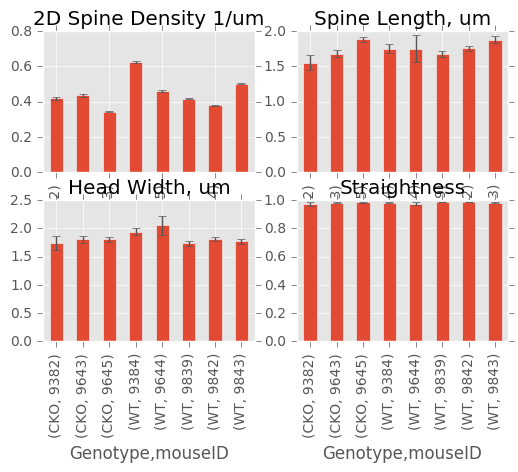

In [128]:
#create pivot table with grouping by MouseID for each measurement
import numpy as np
err = lambda x: (x.std() / x.mean())
sem = lambda x: (x.std() / np.sqrt(x.count()))
N = mergedSpineDFMetaCompleteID[mergedSpineDFMetaCompleteID['oddType'] == 'Normal']
C = mergedSpineDFMetaCompleteID

Napical = N[(N.dendriteType=="apical")&(N.pyramidalLayer=="l5")].groupby(['Genotype','mouseID'], sort=True)
CaSD = C[(C.dendriteType=="apical")&(C.pyramidalLayer=="l5")].groupby(['Genotype','mouseID'], sort=True)['2D Spine Density 1/um']
NaSL = Napical["Spine Length, um"]
NaHW = Napical["Head Width, um"]
NaST = Napical["Straightness"]

# ComparisonApicalL5['mean'] = ApicalL5['Spine Length, um'].mean()
# ComparisonApicalL5['std'] = ApicalL5['Spine Length, um'].std()
# ComparisonApicalL5['err'] = ApicalL5['Spine Length, um'].apply(err)
# ComparisonApicalL5['count'] = ApicalL5['Spine Length, um'].count()

# CKOa_sl=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="CKO"]["Spine Length, um"]
# WTa_sl=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="WT"]["Spine Length, um"]
# CKOa_hw=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="CKO"]["Head Width, um"]
# WTa_hw=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="WT"]["Head Width, um"]
# CKOa_st=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="CKO"]["Straightness"]
# WTa_st=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="WT"]["Straightness"]

#ApicalL5['Spine Length, um'].plot.hist(stacked=False, bins=30)
fig, axes = plt.subplots(nrows=2, ncols=2)

ax = plt.subplot(2,2,1)
ax = CaSD.mean().plot.bar(yerr=CaSD.apply(sem))
ax.set_title('2D Spine Density 1/um')
# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)
ax = plt.subplot(2,2,2)
ax = NaSL.mean().plot.bar(yerr=NaSL.apply(sem))
ax.set_title("Spine Length, um")

ax = plt.subplot(2,2,3)
ax = NaHW.mean().plot.bar(yerr=NaHW.apply(sem))
ax.set_title("Head Width, um")

ax = plt.subplot(2,2,4)
ax = NaST.mean().plot.bar(yerr=NaST.apply(sem))
ax.set_title("Straightness")

In [79]:
blabla = mergedSpineDFMetaCompleteID[(mergedSpineDFMetaCompleteID.dendriteType=="apical")&(mergedSpineDFMetaCompleteID.pyramidalLayer=="l5")]
blabla = blabla[blabla["mouseID"]="9384"]["Spine Length, um","Head Width, um"]

#blabla.plot.scatter(blabla["Spine Length, um","Head Width, um"])

blabla["Spine Length, um"]

SyntaxError: invalid syntax (<ipython-input-79-d15e2c77753d>, line 2)

In [3]:
#l5
apicalCKO = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="CKO") & (mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")]['2D Spine Density 1/um'].drop_duplicates()
apicalWT = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="WT") & (mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")]['2D Spine Density 1/um'].drop_duplicates()

basalCKO = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="CKO") & (mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")]['2D Spine Density 1/um'].drop_duplicates()
basalWT = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="WT") & (mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")]['2D Spine Density 1/um'].drop_duplicates()

#l3
apicalCKOl3 = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="CKO") & (mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l3")]['2D Spine Density 1/um'].drop_duplicates()
apicalWTl3 = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="WT") & (mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l3")]['2D Spine Density 1/um'].drop_duplicates()

basalCKOl3 = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="CKO") & (mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l3")]['2D Spine Density 1/um'].drop_duplicates()
basalWTl3 = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="WT") & (mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l3")]['2D Spine Density 1/um'].drop_duplicates()

In [4]:
import numpy as np
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from scipy.special import stdtr

print("Apical Dendrites on l5===============")
t, p = ttest_ind(apicalCKO, apicalWT, equal_var=False)
print("Two-sample t-test:                        t = %g  p = %g" % (t, p))
u, p_value = mannwhitneyu(apicalCKO, apicalWT)
print("Two-sample Wilcoxon Mann Whitney test,    p=", p_value)

print("Basal Dendrites on l5================")
t, p = ttest_ind(basalCKO, basalWT, equal_var=False)
print("Two-sample t-test:                        t = %g  p = %g" % (t, p))
u, p_value = mannwhitneyu(basalCKO, basalWT)
print("Two-sample Wilcoxon Mann Whitney test,    p=", p_value)

Apical Dendrites on l5===============
Two-sample t-test:                        t = -5.13762  p = 1.06513e-06
Two-sample Wilcoxon Mann Whitney test,    p= 3.15896011998e-06
Basal Dendrites on l5================
Two-sample t-test:                        t = -4.26078  p = 4.372e-05
Two-sample Wilcoxon Mann Whitney test,    p= 5.23678296759e-07


In [5]:
print("WT Apical===============")
print(apicalWT.describe())
print("CKO Apical==============")
print(apicalCKO.describe())

print("WT Basal===============")
print(basalWT.describe())
print("CKO Basal==============")
print(basalCKO.describe())

WT Apical===============
count    103.000000
mean       0.453472
std        0.124546
min        0.243126
25%        0.361633
50%        0.425973
75%        0.529505
max        0.801723
Name: 2D Spine Density 1/um, dtype: float64
CKO Apical==============
count    52.000000
mean      0.357452
std       0.101649
min       0.178879
25%       0.286610
50%       0.341836
75%       0.423054
max       0.628959
Name: 2D Spine Density 1/um, dtype: float64
WT Basal===============
count    71.000000
mean      0.383170
std       0.114646
min       0.172748
25%       0.287840
50%       0.365929
75%       0.469171
max       0.704303
Name: 2D Spine Density 1/um, dtype: float64
CKO Basal==============
count    56.000000
mean      0.286865
std       0.135063
min       0.067741
25%       0.211596
50%       0.251255
75%       0.326263
max       0.831316
Name: 2D Spine Density 1/um, dtype: float64


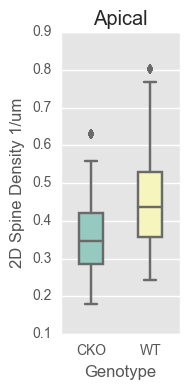

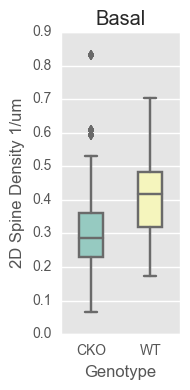

In [6]:
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

mergedSpineDFMetaCompleteApical = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")].drop_duplicates()
plt.figure(figsize=(2, 4))
plt.title("Apical")
ax = sns.boxplot(y="2D Spine Density 1/um", x="Genotype", data=mergedSpineDFMetaCompleteApical, palette="Set3", width=0.4)
plt.savefig('apical-2D Spine DensityComplete.png')


mergedSpineDFMetaCompleteBasal = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")].drop_duplicates()
plt.figure(figsize=(2, 4))
plt.title("Basal")
ax = sns.boxplot(y="2D Spine Density 1/um", x="Genotype", data=mergedSpineDFMetaCompleteBasal, palette="Set3", width=0.4)
plt.savefig('basal-2D Spine DensityComplete.png')

### Other Stats

In [22]:
mergedSpineDFMetaNormalApical = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete['oddType'] == "Normal")&(mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")].drop_duplicates()
mergedSpineDFMetaNormalBasal = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete['oddType'] == "Normal")&(mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")].drop_duplicates()

#"Spine Length, um"
#"Head Width, um"
#"Straightness"
CKOa_sl=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="CKO"]["Spine Length, um"]
WTa_sl=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="WT"]["Spine Length, um"]
CKOa_hw=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="CKO"]["Head Width, um"]
WTa_hw=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="WT"]["Head Width, um"]
CKOa_st=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="CKO"]["Straightness"]
WTa_st=mergedSpineDFMetaNormalApical[mergedSpineDFMetaNormalApical.Genotype=="WT"]["Straightness"]

CKOb_sl=mergedSpineDFMetaNormalBasal[mergedSpineDFMetaNormalBasal.Genotype=="CKO"]["Spine Length, um"]
WTb_sl=mergedSpineDFMetaNormalBasal[mergedSpineDFMetaNormalBasal.Genotype=="WT"]["Spine Length, um"]
CKOb_hw=mergedSpineDFMetaNormalBasal[mergedSpineDFMetaNormalBasal.Genotype=="CKO"]["Head Width, um"]
WTb_hw=mergedSpineDFMetaNormalBasal[mergedSpineDFMetaNormalBasal.Genotype=="WT"]["Head Width, um"]
CKOb_st=mergedSpineDFMetaNormalBasal[mergedSpineDFMetaNormalBasal.Genotype=="CKO"]["Straightness"]
WTb_st=mergedSpineDFMetaNormalBasal[mergedSpineDFMetaNormalBasal.Genotype=="WT"]["Straightness"]

### P-values

In [23]:
print("Apical Spine Length on l5===============")
t, p = ttest_ind(CKOa_sl, WTa_sl, equal_var=False)
print("Two-sample t-test:                        t = %g  p = %g" % (t, p))
u, p_value = mannwhitneyu(CKOa_sl, WTa_sl)
print("Two-sample Wilcoxon Mann Whitney test,    p=", p_value)

print("Basal Spine Length on l5================")
t, p = ttest_ind(CKOb_sl, WTb_sl, equal_var=False)
print("Two-sample t-test:                        t = %g  p = %g" % (t, p))
u, p_value = mannwhitneyu(CKOb_sl, WTb_sl)
print("Two-sample Wilcoxon Mann Whitney test,    p=", p_value)
print("------------------------------------------------------------")

print("Apical Head Width on l5===============")
t, p = ttest_ind(CKOa_hw, WTa_hw, equal_var=False)
print("Two-sample t-test:                        t = %g  p = %g" % (t, p))
u, p_value = mannwhitneyu(CKOa_hw, WTa_hw)
print("Two-sample Wilcoxon Mann Whitney test,    p=", p_value)

print("Basal Head Width on l5================")
t, p = ttest_ind(CKOb_hw, WTb_hw, equal_var=False)
print("Two-sample t-test:                        t = %g  p = %g" % (t, p))
u, p_value = mannwhitneyu(CKOb_hw, WTb_hw)
print("Two-sample Wilcoxon Mann Whitney test,    p=", p_value)
print("------------------------------------------------------------")

print("Apical Straightness on l5===============")
t, p = ttest_ind(CKOa_st, WTa_st, equal_var=False)
print("Two-sample t-test:                        t = %g  p = %g" % (t, p))
u, p_value = mannwhitneyu(CKOa_st, WTa_st)
print("Two-sample Wilcoxon Mann Whitney test,    p=", p_value)

print("Basal Straightness on l5================")
t, p = ttest_ind(CKOb_st, WTb_st, equal_var=False)
print("Two-sample t-test:                        t = %g  p = %g" % (t, p))
u, p_value = mannwhitneyu(CKOb_st, WTb_st)
print("Two-sample Wilcoxon Mann Whitney test,    p=", p_value)

Apical Spine Length on l5===============
Two-sample t-test:                        t = 1.49322  p = 0.135558
Two-sample Wilcoxon Mann Whitney test,    p= 0.240619911428
Basal Spine Length on l5================
Two-sample t-test:                        t = 2.62353  p = 0.00881029
Two-sample Wilcoxon Mann Whitney test,    p= 0.0348179803957
------------------------------------------------------------
Apical Head Width on l5===============
Two-sample t-test:                        t = -0.11652  p = 0.907254
Two-sample Wilcoxon Mann Whitney test,    p= 0.0616287736056
Basal Head Width on l5================
Two-sample t-test:                        t = 1.84276  p = 0.0655972
Two-sample Wilcoxon Mann Whitney test,    p= 0.357395660809
------------------------------------------------------------
Apical Straightness on l5===============
Two-sample t-test:                        t = -1.78907  p = 0.0737889
Two-sample Wilcoxon Mann Whitney test,    p= 0.00507003676406
Basal Straightness on l5===